[Reference](https://medium.com/analytics-vidhya/simple-sentiment-analysis-in-python-nysk-dataset-de17cd0efbe1)

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive/Medium')

Mounted at /content/gdrive


In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sb

import xml.etree.ElementTree as et

# Parsing the XML into a Pandas dataframe
file = et.parse('nysk.xml')
root = file.getroot()
columns = ["DocID", "Source", "URL", "Title", "Summary", "Date"] # Setting the columns of the Dataframe

summary_list = []
dataset = pd.DataFrame(columns = columns)

for each_node in root:
    doc = each_node.find("docid").text
    source = each_node.find("source").text
    url = each_node.find("url").text
    title = each_node.find("title").text
    summary = each_node.find("summary").text
    date = each_node.find("date").text
    
    dataset = dataset.append(pd.Series([doc, source, url, title, summary, date],
                                             index = columns), ignore_index = True)

In [3]:
# Sentiment Analysis with Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

sentiment_dict = dict()

for sentence in dataset["Summary"]:
    sent = analyzer.polarity_scores(sentence)

    # Creating a dictionary of sentiment scores and their values
    # Setting up keys
    sentiment_dict.setdefault('Negative_Score', [])
    sentiment_dict.setdefault('Neutral_Score', [])
    sentiment_dict.setdefault('Positive_Score', [])
    sentiment_dict.setdefault('Compound_Score', [])

    # Appending values to the respective keys
    sentiment_dict['Negative_Score'].append(sent.get('neg'))
    sentiment_dict['Neutral_Score'].append(sent.get('neu'))
    sentiment_dict['Positive_Score'].append(sent.get('pos'))
    sentiment_dict['Compound_Score'].append(sent.get('compound'))

sentiment_df = pd.DataFrame.from_dict(sentiment_dict, orient = "columns")
sentiment_df.insert(loc = 0, column = "Article", value = dataset["Summary"])

# Bonus Dataset creation
class_list = list()

for m in range(len(sentiment_df)):
    if sentiment_df['Neutral_Score'][m] > 0.5:
        class_list.append("Neutral")
    elif sentiment_df['Negative_Score'][m] > 0.5:
        class_list.append('Negative')
    else:
        class_list.append('Positive')

# Adding the Class Label as the last column to the sentiment dataframe
sentiment_df.insert(loc = 5, column = "Sentiment", value = class_list)

# Storing the sentiment dataframe as a CSV for easy perusal later on
sentiment_df.to_csv('sentiment_analysis.csv', index = False, header = True)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
sentiment_df.head()

,Article,Negative_Score,Neutral_Score,Positive_Score,Compound_Score,Sentiment
0,The New York Post has learned that the woman a...,0.175,0.825,0.000,-0.6705,Neutral
1,Strauss-Kahn’s NY apartment plan falls apart A...,0.103,0.897,0.000,-0.8225,Neutral
2,"According to a worrying CSA poll, it seems tha...",0.212,0.762,0.027,-0.9201,Neutral
3,Traces of Strauss-Kahn's DNA found on alleged ...,0.151,0.849,0.000,-0.9349,Neutral
4,The French doesn't always have a high opinion ...,0.060,0.855,0.085,0.3182,Neutral


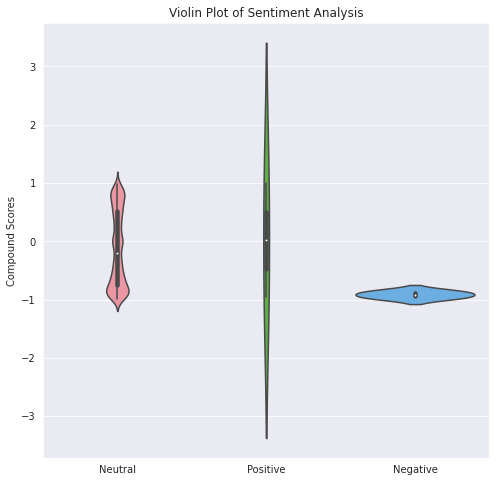

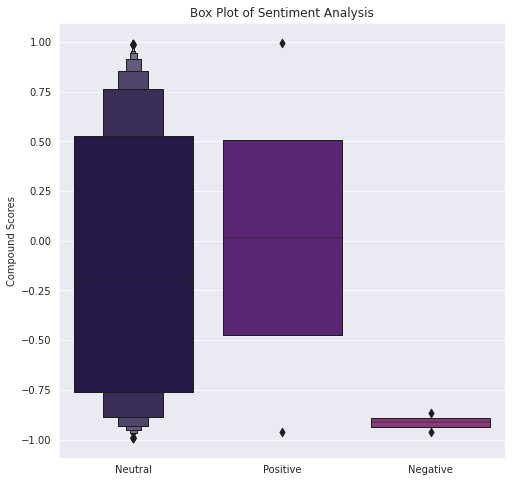

In [4]:
# Seaborn plot visualizations
import matplotlib.pyplot as plt
import seaborn as sb

# 1) Violin Plot
plt.figure(figsize=(8,8))
sb.set_style('darkgrid')
plt.title("Violin Plot of Sentiment Analysis")
sb.violinplot(x = sentiment_df.iloc[:, -1].values, y = sentiment_df.iloc[:, -2].values,
           data = sentiment_df, palette = sb.set_palette('magma', n_colors = 1))
plt.ylabel("Compound Scores")
plt.show()

# 2) Box Plot
plt.figure(figsize=(8,8))
sb.set_style('darkgrid')
plt.title("Box Plot of Sentiment Analysis")
sb.boxenplot(x = sentiment_df.iloc[:, -1].values, y = sentiment_df.iloc[:, -2].values,
           data = sentiment_df, palette = sb.set_palette('magma', n_colors = 6))
plt.ylabel("Compound Scores")
plt.show()